### Model Type Plots

In [2]:
from experiments import get_seeds, get_models, avf_file, read_rmse_data, clamp_episodes, plot_model_type
    
exp = "s_2"
exp = "s_4"
exp = "s_8"
# exp = "s_16"
# exp = "s_32"
plots_dir = "../../../results/kay/rl/examples"
results_dir = f"{plots_dir}/Example_{exp}"
max_number_of_episodes = 200

seeds = get_seeds(results_dir)
avf_rmse_df = read_rmse_data(results_dir, seeds, avf_file)
avf_rmse_df = clamp_episodes(avf_rmse_df, 0, max_number_of_episodes)

# plot_model_type(avf_rmse_df, plots_dir, 'QLearning', f'{exp}_QLearning_AVF',                hue='s', y='RMSE')
# plot_model_type(avf_rmse_df, plots_dir, 'QLambdaLearning', f'{exp}_QLambdaLearning_AVF',  col="s", hue='ed', y='RMSE', col_wrap=2)
# plot_model_type(avf_rmse_df, plots_dir, 'QDLearning', f'{exp}_QDLearning_AVF',             col="is", hue='cs', y='RMSE', col_wrap=2)
# plot_model_type(avf_rmse_df, plots_dir, 'QDLambdaLearning', f'{exp}_QDLambdaLearning_AVF', row='is', hue="ed", col="cs", y='RMSE')


In [3]:
from experiments import read_armse_data, clamp_episodes

avf_armse_df = read_armse_data(results_dir, avf_file)
avf_armse_df = clamp_episodes(avf_armse_df, 0, max_number_of_episodes)

# plot_model_type(avf_armse_df, plots_dir, 'QLambdaLearning', f'{exp}_QLambdaLearning_AVF',  col="s", hue='ed', y='ARMSE', col_wrap=2, ylim=None)
# plot_model_type(avf_armse_df, plots_dir, 'QDLearning', f'{exp}_QDLearning_AVF', col="is", hue='cs', y='ARMSE', col_wrap=2, ylim=None)
plot_model_type(avf_armse_df, plots_dir, 'QDLambdaLearning', f'{exp}_QDLambdaLearning_AVF', row='is', hue="ed", col="cs", y='ARMSE', ylim=None)


Saved ../../../results/kay/rl/examples/s_8_QDLambdaLearning_AVF_ARMSE_by_model_type.eps


In [34]:
from experiments import split_model_name, best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes, latex_table, split_by

model_type = 'QDLambdaLearning'
episodes = [200, 50]

model_type_avf_rmse_df = avf_rmse_df[avf_rmse_df.Model.str.startswith(model_type)]
model_type_avf_rmse_df

best_by_model_type_avf_rmse_df = best_by_model_for_episodes(model_type_avf_rmse_df, y='RMSE', episodes=episodes)
# best_by_model_type_avf_rmse_df = split_model_name(best_by_model_type_avf_rmse_df)
best_by_model_type_avf_rmse_df


best_by_model_for_episodes_split_avf_rmse_df = widen_best_by_model_for_episodes(best_by_model_type_avf_rmse_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_rmse_df


best_by_model_for_episodes_split_avf_rmse_df = best_by_model_for_episodes_split_avf_rmse_df.sort_values('Configuration')
best_by_model_for_episodes_split_avf_rmse_df

params = best_by_model_for_episodes_split_avf_rmse_df['Configuration'][0].split(' ')
for param_index in range(len(params)):
    param_name = params[param_index].split('=')[0]
    best_by_model_for_episodes_split_avf_rmse_df.insert(1, param_name, best_by_model_for_episodes_split_avf_rmse_df['Configuration'].str.split(' ').str.get(param_index).str.split('=').str.get(1))

best_by_model_for_episodes_split_avf_rmse_df
best_by_model_for_episodes_split_avf_rmse_df = best_by_model_for_episodes_split_avf_rmse_df.drop('Model Type', axis=1)
best_by_model_for_episodes_split_avf_rmse_df = best_by_model_for_episodes_split_avf_rmse_df.drop('Configuration', axis=1)
best_by_model_for_episodes_split_avf_rmse_df = best_by_model_for_episodes_split_avf_rmse_df[['is', 'cs','ed', 'RMSE (Episode=50)', 'p-value (Episode=50)', 'RMSE (Episode=200)', 'p-value (Episode=200)']]
best_by_model_for_episodes_split_avf_rmse_df
the_latex_table = latex_table(best_by_model_for_episodes_split_avf_rmse_df)
print(the_latex_table)

0.005 & 0.00125 & 0.3 & 0.1031 & 0.0000 & 0.0129 & 0.0009 \\ 
0.005 & 0.00125 & 0.6 & 0.1004 & 0.0000 & 0.0141 & 0.0000 \\ 
0.005 & 0.00125 & 0.9 & 0.0987 & 0.0000 & 0.0187 & 0.0000 \\ 
0.005 & 0.0025 & 0.3 & 0.1045 &  - & 0.0120 &  - \\ 
0.005 & 0.0025 & 0.6 & 0.1004 & 0.0000 & 0.0127 & 0.0014 \\ 
0.005 & 0.0025 & 0.9 & 0.0982 & 0.0000 & 0.0170 & 0.0000 \\ 
0.005 & 0.005 & 0.3 & 0.1045 & 0.0000 & 0.0135 & 0.8931 \\ 
0.005 & 0.005 & 0.6 & 0.0991 & 0.0000 & 0.0134 & 0.0050 \\ 
0.005 & 0.005 & 0.9 & 0.0984 & 0.0000 & 0.0191 & 0.0000 \\ 
0.01 & 0.00125 & 0.3 & 0.0332 & 0.0000 & 0.0198 & 0.0000 \\ 
0.01 & 0.00125 & 0.6 & 0.0345 & 0.0000 & 0.0225 & 0.0000 \\ 
0.01 & 0.00125 & 0.9 & 0.0412 & 0.0000 & 0.0308 & 0.0000 \\ 
0.01 & 0.0025 & 0.3 & 0.0322 & 0.0000 & 0.0180 & 0.0000 \\ 
0.01 & 0.0025 & 0.6 & 0.0330 & 0.0000 & 0.0199 & 0.0000 \\ 
0.01 & 0.0025 & 0.9 & 0.0382 & 0.0000 & 0.0274 & 0.0000 \\ 
0.01 & 0.005 & 0.3 & 0.0323 & 0.0000 & 0.0176 & 0.0000 \\ 
0.01 & 0.005 & 0.6 & 0.0323 & 0.0000 

### RMSE AVF

In [44]:
from experiments import get_seeds, read_rmse_data, avf_file, clamp_episodes, best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes, latex_table

exp = "s_2"
exp = "s_4"
exp = "s_8"
exp = "s_16"
exp = "s_32"

max_number_of_episodes = 200
results_dir = f"../../../results/kay/rl/examples/Example_{exp}"
episodes = [200, 50]

seeds = get_seeds(results_dir)

avf_rmse_df = read_rmse_data(results_dir, seeds, avf_file)
avf_rmse_df = clamp_episodes(avf_rmse_df, 0, max_number_of_episodes)
best_by_model_type_avf_rmse_df = best_by_model_type(avf_rmse_df, y='RMSE')
print(best_by_model_type_avf_rmse_df['Model'].unique())
best_by_model_for_episodes_avf_rmse_df = best_by_model_for_episodes(best_by_model_type_avf_rmse_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_rmse_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_avf_rmse_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_rmse_df
    
the_latex_table = latex_table(best_by_model_for_episodes_split_avf_rmse_df)
print(the_latex_table)

['QDLambdaLearning_is_0.005_cs_0.005_ed_0.3'
 'QDLearning_is_0.005_cs_0.005' 'QLambdaLearning_s_0.005_ed_0.3'
 'QLearning_s_0.005']
QDLearning & is=0.005 cs=0.005 & 0.1230 &  - & 0.0067 &  - \\ 
QDLambdaLearning & is=0.005 cs=0.005 ed=0.3 & 0.1091 & 0.0000 & 0.0069 & 0.0315 \\ 
QLearning & s=0.005 & 0.1536 & 0.0000 & 0.0120 & 0.0000 \\ 
QLambdaLearning & s=0.005 ed=0.3 & 0.1480 & 0.0000 & 0.0130 & 0.0000 \\ 



In [45]:
from experiments import read_armse_data 

avf_armse_df = read_armse_data(results_dir, avf_file)
avf_armse_df = clamp_episodes(avf_armse_df, 0, max_number_of_episodes)
best_by_model_type_avf_armse_df = best_by_model_type(avf_armse_df, y='ARMSE')
best_by_model_for_episodes_avf_armse_df = best_by_model_for_episodes(best_by_model_type_avf_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_armse_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_avf_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_armse_df

best_by_model_for_episodes_split_avf_armse_df.at[0,'Configuration'] = best_by_model_for_episodes_split_avf_armse_df.at[0,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_armse_df.at[1,'Configuration'] = best_by_model_for_episodes_split_avf_armse_df.at[1,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_armse_df.at[2,'Configuration'] = best_by_model_for_episodes_split_avf_armse_df.at[2,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_armse_df.at[3,'Configuration'] = best_by_model_for_episodes_split_avf_armse_df.at[3,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")

the_latex_table = latex_table(best_by_model_for_episodes_split_avf_armse_df)
print(the_latex_table)

QDLearning & $\alpha$=0.025 $\beta$=0.005 & 5.4982 &  - & 8.7062 &  - \\ 
QDLambdaLearning & $\alpha$=0.025 $\beta$=0.005 $\lambda$=0.3 & 5.4072 & 0.0000 & 8.8412 & 0.0001 \\ 
QLearning & $\alpha$=0.025 & 5.1073 & 0.0000 & 9.4547 & 0.0000 \\ 
QLambdaLearning & $\alpha$=0.025 $\lambda$=0.3 & 5.0116 & 0.0000 & 9.7903 & 0.0000 \\ 



In [ ]:
from experiments import plot

plot(results_dir, f"{exp}_AVF_RMSE_best", best_by_model_type_avf_rmse_df, y='RMSE', ylim=0.2)

In [ ]:
from experiments import plot

plot(results_dir, f"{exp}_AVF_ARMSE_best", best_by_model_type_avf_armse_df, y='ARMSE')

### ARMSE AVF

In [ ]:
from experiments import get_seeds, avf_file, read_rmse_data, clamp_episodes, save_data, armse

exp = "s_2"
exp = "s_4"
exp = "s_8"
exp = "s_16"
# exp = "s_32"
results_dir = f"../../../results/kay/rl/examples/Example_{exp}"
max_number_of_episodes = 200
episodes = [200, 50]

seeds = get_seeds(results_dir)
avf_df = read_rmse_data(results_dir, seeds, avf_file)
avf_df = clamp_episodes(avf_df, 0, max_number_of_episodes)

# armse_df = armse(avf_df, seeds)
# save_data(results_dir, avf_file, armse_df, suffix='ARMSE')

In [ ]:
from experiments import read_armse_data, best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes 

avf_armse_df = read_armse_data(results_dir, avf_file)
best_by_model_type_avf_armse_df = best_by_model_type(avf_armse_df, y='ARMSE')
best_by_model_for_episodes_avf_armse_df = best_by_model_for_episodes(best_by_model_type_avf_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_armse_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_avf_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_armse_df

In [ ]:
from experiments import plot_armse

plot_armse(results_dir, f"{exp}_AVF_ARMSE_best", best_by_model_type_avf_armse_df, y='ARMSE')

### RMSE Policy

In [ ]:
from experiments import policy_file, get_seeds, read_rmse_data, clamp_episodes

exp = "s_2"
exp = "s_4"
exp = "s_8"
exp = "s_16"
exp = "s_32"
results_dir = f"../../../results/kay/rl/examples/Example_{exp}"

max_number_of_episodes = 200
episodes = [200, 50]

seeds = get_seeds(results_dir)
policy_df = read_rmse_data(results_dir, seeds, policy_file)
policy_df = clamp_episodes(policy_df, 0, max_number_of_episodes)

In [ ]:
from experiments import best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes

best_by_model_type_policy_df = best_by_model_type(policy_df, y='RMSE')
best_by_model_for_episodes_policy_df = best_by_model_for_episodes(best_by_model_type_policy_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_policy_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_policy_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_policy_df

In [ ]:
from experiments import plot

plot(results_dir, f"{exp}_Policy_RMSE_best", best_by_model_type_policy_df, y="RMSE")

### ARMSE Policy

In [ ]:
from experiments import get_seeds, policy_file, read_rmse_data, clamp_episodes, save_data, armse

exp = "s_2"
exp = "s_4"
exp = "s_8"
exp = "s_16"
exp = "s_32"
results_dir = f"../../../results/kay/rl/examples/Example_{exp}"
max_number_of_episodes = 200

seeds = get_seeds(results_dir)
policy_df = read_rmse_data(results_dir, seeds, policy_file)
policy_df = clamp_episodes(policy_df, 0, max_number_of_episodes)

# policy_armse_df = armse(policy_df, seeds)
# save_data(results_dir, policy_file, policy_armse_df, suffix='ARMSE')

In [ ]:
from experiments import read_armse_data, best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes 

episodes = [200, 25, 50, 100]

policy_armse_df = read_armse_data(results_dir, policy_file)
best_by_model_type_policy_armse_df = best_by_model_type(policy_armse_df, y='ARMSE')
best_by_model_for_episodes_policy_armse_df = best_by_model_for_episodes(best_by_model_type_policy_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_policy_armse_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_policy_armse_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_policy_armse_df

In [ ]:
from experiments import plot_armse

plot_armse(results_dir, f"{exp}_Policy_ARMSE_best", best_by_model_type_policy_armse_df, y='ARMSE')

### Debugging

Saved ../../../results/kay/rl/examples/s_32_Policy_RMSE_best.png


<AxesSubplot:xlabel='Episode', ylabel='RMSE'>

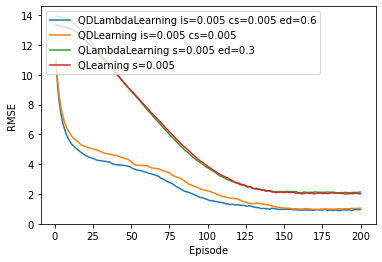

In [69]:
from experiments import avf_file, policy_file, get_seeds, read_rmse_data, clamp_episodes, plot

file = avf_file; ylim=0.2; loc='lower right'
exp = "s_4"
models = ['QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3',
          'QDLearning_is_0.005_cs_0.00125',
          'QLambdaLearning_s_0.005_ed_0.3',
          'QLearning_s_0.005']
exp = "s_8"
models = ['QDLambdaLearning_is_0.005_cs_0.0025_ed_0.3',
          'QDLearning_is_0.005_cs_0.0025',
          'QLambdaLearning_s_0.005_ed_0.3',
          'QLearning_s_0.005']
exp = "s_16"
models = ['QDLambdaLearning_is_0.005_cs_0.005_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QLambdaLearning_s_0.005_ed_0.3',
          'QLearning_s_0.005']
exp = "s_32"
models = ['QDLambdaLearning_is_0.005_cs_0.005_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QLambdaLearning_s_0.005_ed_0.3',
          'QLearning_s_0.005']

file = policy_file; ylim=None; loc='upper left'
exp = "s_4"
models = ['QLearning_s_0.01', 
          'QLambdaLearning_s_0.01_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QDLambdaLearning_is_0.005_cs_0.005_ed_0.3']
exp = "s_8"
models = ['QLearning_s_0.01', 
          'QLambdaLearning_s_0.01_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QDLambdaLearning_is_0.005_cs_0.005_ed_0.3']
exp = "s_16"
models = ['QLearning_s_0.005', 
          'QLambdaLearning_s_0.005_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QDLambdaLearning_is_0.005_cs_0.005_ed_0.3']
exp = "s_32"
models = ['QLearning_s_0.005', 
          'QLambdaLearning_s_0.005_ed_0.3',
          'QDLearning_is_0.005_cs_0.005',
          'QDLambdaLearning_is_0.005_cs_0.005_ed_0.6']

plots_dir = f"../../../results/kay/rl/examples"
results_dir = f"{plots_dir}/Example_{exp}"

max_number_of_episodes = 200
episodes = [200, 50]

seeds = get_seeds(results_dir)
df = read_rmse_data(results_dir, seeds, file)
df = clamp_episodes(df, 0, max_number_of_episodes)
models_df = df[df['Model'].isin(models)]
plot(plots_dir, f"{exp}_{file}_RMSE_best", models_df, y="RMSE", ylim=ylim)
# plot(plots_dir, f"{exp}_{file}_RRMSE_best", models_df, y="Rolling Mean RMSE", ylim=ylim)

In [70]:
from experiments import best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes, latex_table
best_by_model_type_avf_rmse_df = best_by_model_type(models_df, y='RMSE')
best_by_model_for_episodes_avf_rmse_df = best_by_model_for_episodes(best_by_model_type_avf_rmse_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_rmse_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_avf_rmse_df, y='RMSE', episodes=episodes)
best_by_model_for_episodes_split_avf_rmse_df

best_by_model_for_episodes_split_avf_rmse_df.at[0,'Configuration'] = best_by_model_for_episodes_split_avf_rmse_df.at[0,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_rmse_df.at[1,'Configuration'] = best_by_model_for_episodes_split_avf_rmse_df.at[1,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_rmse_df.at[2,'Configuration'] = best_by_model_for_episodes_split_avf_rmse_df.at[2,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_avf_rmse_df.at[3,'Configuration'] = best_by_model_for_episodes_split_avf_rmse_df.at[3,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")

the_latex_table = latex_table(best_by_model_for_episodes_split_avf_rmse_df)
print(the_latex_table)

QDLambdaLearning & $\alpha$=0.005 $\beta$=0.005 $\lambda$=0.6 & 3.7773 &  - & 0.9622 &  - \\ 
QDLearning & $\alpha$=0.005 $\beta$=0.005 & 4.1875 & 0.0000 & 1.0518 & 0.7064 \\ 
QLearning & $\alpha$=0.005 & 8.9549 & 0.0000 & 2.0069 & 0.0000 \\ 
QLambdaLearning & $\alpha$=0.005 $\lambda$=0.3 & 8.9089 & 0.0000 & 2.1288 & 0.0000 \\ 



Saved ../../../results/kay/rl/examples/s_32_Policy_ARMSE_best.png


<AxesSubplot:xlabel='Episode', ylabel='ARMSE'>

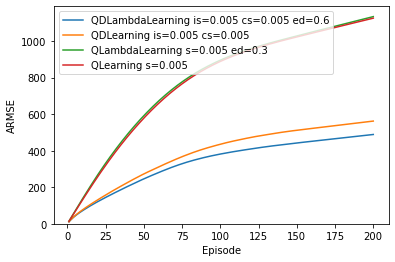

In [71]:
from experiments import read_armse_data, clamp_episodes, plot_armse

df = read_armse_data(results_dir, file)
df = clamp_episodes(df, 0, max_number_of_episodes)
models_df = df[df['Model'].isin(models)]
plot_armse(plots_dir, f"{exp}_{file}_ARMSE_best", models_df, y="ARMSE", loc=loc)

In [72]:
from experiments import best_by_model_type, best_by_model_for_episodes, widen_best_by_model_for_episodes, latex_table

best_by_model_type_df = best_by_model_type(models_df, y='ARMSE')
best_by_model_for_episodes_df = best_by_model_for_episodes(best_by_model_type_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_df = widen_best_by_model_for_episodes(best_by_model_for_episodes_df, y='ARMSE', episodes=episodes)
best_by_model_for_episodes_split_df

best_by_model_for_episodes_split_df.at[0,'Configuration'] = best_by_model_for_episodes_split_df.at[0,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_df.at[1,'Configuration'] = best_by_model_for_episodes_split_df.at[1,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_df.at[2,'Configuration'] = best_by_model_for_episodes_split_df.at[2,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")
best_by_model_for_episodes_split_df.at[3,'Configuration'] = best_by_model_for_episodes_split_df.at[3,'Configuration'].replace("is", "$\\alpha$").replace("cs", "$\\beta$").replace("s", "$\\alpha$").replace("ed", "$\\lambda$")


In [73]:
the_latex_table = latex_table(best_by_model_for_episodes_split_df)
print(the_latex_table)

QDLambdaLearning & $\alpha$=0.005 $\beta$=0.005 $\lambda$=0.6 & 245.8556 &  - & 488.4703 &  - \\ 
QDLearning & $\alpha$=0.005 $\beta$=0.005 & 272.9207 & 0.0000 & 561.8105 & 0.0257 \\ 
QLearning & $\alpha$=0.005 & 578.0760 & 0.0012 & 1124.6692 & 0.0000 \\ 
QLambdaLearning & $\alpha$=0.005 $\lambda$=0.3 & 591.4039 & 0.0006 & 1133.1125 & 0.0000 \\ 



In [78]:
from experiments import read_rmse_data, read_armse_data

def mean_error(df, seeds, models=[]):
    if models == []:
        models = df['Model'].unique()
    me_df = pd.DataFrame()
    for model in models:
        model_df = df[df["Model"] == model]
        model_pivot_df = pd.pivot_table(model_df, index=['Model','Episode'], values=['Error'], aggfunc=np.mean)
#         model_pivot_df = pd.DataFrame(model_pivot_df.to_records())
#         model_pivot_df['RMSE'] = pow(model_pivot_df['Squared Error'], 0.5)
#         model_pivot_df['Rolling Mean RMSE'] = model_pivot_df['RMSE'].rolling(rolling_count).mean()
        me_df = me_df.append(model_pivot_df)
    accumulate_field_name = f"AME"
    new_df = pd.DataFrame()
    for model in models:
        for seed in seeds:
            seed_model_df = df[(df['Model'] == model) & (df['Seed'] == seed)]
            accumulate_field = seed_model_df['ME'].cumsum()
            seed_model_df = seed_model_df.assign(accumulate_field_name=accumulate_field) 
            seed_model_df.rename(columns={"accumulate_field_name":'ARMSE'}, inplace=True)
            new_df = new_df.append(seed_model_df)
    return(new_df)

seeds = get_seeds(results_dir)
df = read_rmse_data(results_dir, seeds, file)
df

index                                        Model  Episode  \
0           0  QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3        1   
1           1  QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3        2   
2           2  QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3        3   
3           3  QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3        4   
4           4  QDLambdaLearning_is_0.005_cs_0.00125_ed_0.3        5   
...       ...                                          ...      ...   
511995  12795                             QLearning_s_0.05      196   
511996  12796                             QLearning_s_0.05      197   
511997  12797                             QLearning_s_0.05      198   
511998  12798                             QLearning_s_0.05      199   
511999  12799                             QLearning_s_0.05      200   

        Squared Error       RMSE  Rolling Mean RMSE  \
0              142.62  11.942362                NaN   
1              134.22  11.585336                NaN   
2              124.02  11.136427                NaN   
3              113.66  10.661144                NaN   
4              102.66  10.132127          11.091479   
...               ...        ...                ...   
511995          96.42   9.819369           9.716166   
511996          92.94   9.640539           9.684478   
511997          92.38   9.611452           9.643506   
511998          89.78   9.475231           9.608370   
511999          85.52   9.247702           9.558859   

                                         Model Name  Seed  
0       QDLambdaLearning is=0.005 cs=0.00125 ed=0.3     0  
1       QDLambdaLearning is=0.005 cs=0.00125 ed=0.3     0  
2       QDLambdaLearning is=0.005 cs=0.00125 ed=0.3     0  
3       QDLambdaLearning is=0.005 cs=0.00125 ed=0.3     0  
4       QDLambdaLearning is=0.005 cs=0.00125 ed=0.3     0  
...                                             ...   ...  
511995                             QLearning s=0.05    39  
511996                             QLearning s=0.05    39  
511997                             QLearning s=0.05    39  
511998                             QLearning s=0.05    39  
511999                             QLearning s=0.05    39  

[512000 rows x 8 columns]

### Agent

In [ ]:
from experiments import get_seeds, get_models, avf_file, read_data

import matplotlib.pyplot as plt
import seaborn as sns

exp = "s_2"
# exp = "s_4"
exp = "s_8"
# exp = "s_16"
# exp = "s_32"
plots_dir = "../../../results/kay/rl/examples"
seed = 0
model = 'QLearning_s_0.01'
agent=1

results_dir = f"{plots_dir}/Example_{exp}/{seed}"
avf_df = read_data(results_dir, avf_file, [model])

In [ ]:
plot_path = f"{plots_dir}/{exp}_{seed}_{model}_{avf_file}.eps"

agent_df = avf_df[avf_df['Agent'] == agent]
agent_df = agent_df[['StateAction','Episode','Value','Squared Error']]
long_agent_df = agent_df.melt(['StateAction','Episode'], var_name='cols', value_name='vals')

sns_plot = sns.relplot(data=long_agent_df, x="Episode", y="vals", hue="StateAction", col="cols",  kind="line")
sns_plot.set(ylim=(None, 4))
plt.subplots_adjust(left=0.05, bottom=0.15)
for item, ax in sns_plot.axes_dict.items():
    ax.grid(False, axis='x')
    ax.set_title(item)
sns_plot.fig.savefig(plot_path)

In [ ]:
from experiments import get_seeds, read_rmse_data, read_armse_data

results_dir = f"{plots_dir}/Example_{exp}"
plot_path = f"{plots_dir}/{exp}_{model}_{avf_file}_RMSE_ARMSE.eps"

seeds = get_seeds(results_dir)

avf_armse_df = read_armse_data(results_dir, avf_file)
avf_armse_model_df = avf_armse_df[avf_armse_df['Model'] == model]
avf_armse_model_df = avf_armse_model_df[['Model','Episode','RMSE','ARMSE']]
long_avf_armse_model_df = avf_armse_model_df.melt(['Model','Episode'], var_name='cols', value_name='vals')

long_avf_armse_model_df

sns_plot = sns.relplot(data=long_avf_armse_model_df, x="Episode", y="vals", col="cols",  kind="line", ci=None)
# sns_plot.set(ylim=(None, 4))
plt.subplots_adjust(left=0.05, bottom=0.15)
for item, ax in sns_plot.axes_dict.items():
    ax.grid(False, axis='x')
    ax.set_title(item)
sns_plot.fig.savefig(plot_path)

In [ ]:
# Analyse one seed
from experiments import process_models, read_avf_data, rmse_df

summary_df = process_models(results_dir, seed, models)
print(summary_df)